# Hierarchical Clustering

Start by loading data and preprocessing data. For the motivation behind the feature selection, refer to the notebook in the K-means task.

## Preprocessing

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = pd.read_csv('Mall_Customers.csv',index_col=0)

# Select useful features
X = df[['Annual Income (k$)','Spending Score (1-100)']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

# Select K
K = 5

Data size:
(200, 2)


## Clustering

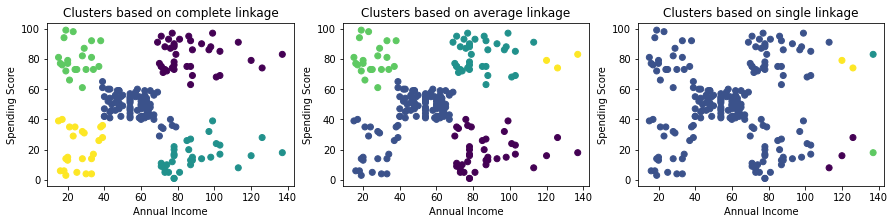

In [2]:
plt.figure(figsize=[15,3])

linkage_types = ['complete', 'average', 'single']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=l)
  cluster.fit_predict(X)

  ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
  
  plt.title('Clusters based on {} linkage'.format(l))
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score')
 
L = 'complete'

## Visualisation

We are going to visualise the dendogram based on complete linkage to choose a value for K. Scikit-learn has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimise distances as parameters. The vertical height of lines corresponds to the euclidean distance between clusters.

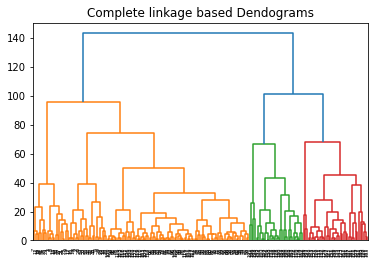

In [3]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='complete'))  

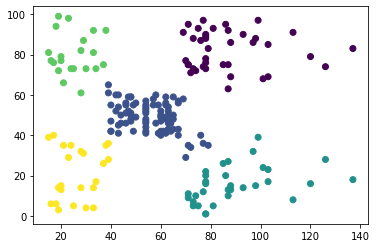

In [4]:
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

## Interpretation

The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. The customers at top right have high salaries and spend a lot. These are the type of customers that companies target. Both groups have a long tail, showing the presence of a small group of very high-income shoppers.

The customers in the middle are the ones with average income and average spending. The density of this clusters shows that this cluster contains the most companies. For this reason, companies also target these customers.

## Loading Iris Dataset

In [6]:
# load the data
iris_df =pd.read_csv('iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# check missing data
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# remove innecessary columns
iris_df.drop('Id',axis = 1, inplace = True)

## Feature Selection and Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

# select features
X = iris_df[['PetalLengthCm','PetalWidthCm']]

# scaling object
scaler = MinMaxScaler()

X = scaler.fit_transform(X) # scaled features

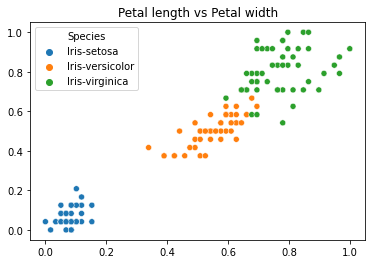

In [14]:
# plot the variables
scatter = sns.scatterplot(x = X[:,0], y = X[:,1], hue = iris_df['Species']);

scatter.set(title='Petal length vs Petal width');

## Dendrogram Plots
Plotting dendrograms using single and complete linkages, and Euclidean and Cityblock distange metrics.

In [33]:
# function for plotting dendrograms
def dendrogram_plot(data, linkage_type, metric_type):
    
    # plot title
    plt.title(f"{linkage_type} linkage and {metric_type} distance metric")  
    
    # dendrogram plot
    dendogram = dendrogram(linkage(data, method = linkage_type, metric = metric_type))
    
    

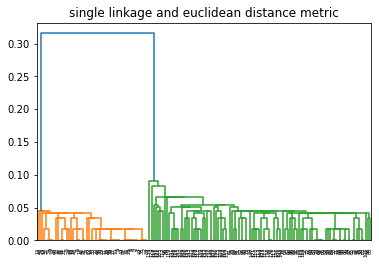

In [34]:
# single linkage and euclidean distance metric dendrogram
dendrogram_plot(X,'single','euclidean')

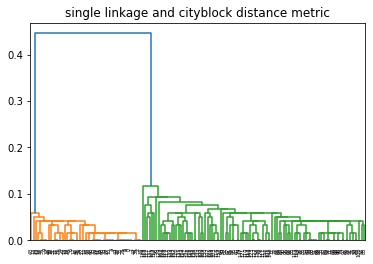

In [35]:
# single linkage and cityblock distance metric dendrogram
dendrogram_plot(X,'single','cityblock')

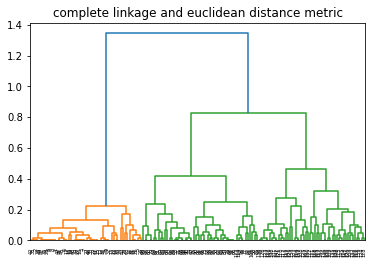

In [36]:
# complete linkage and euclidean distance metric dendrogram
dendrogram_plot(X,'complete','euclidean')

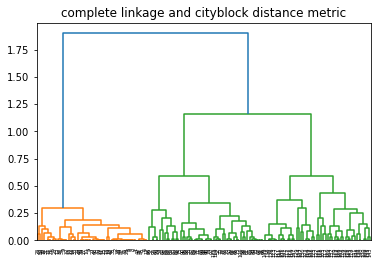

In [37]:
# complete linkage and cityblock distance metric dendrogram
dendrogram_plot(X,'complete','cityblock')

## Agglomerative Hierarchical Clustering
The chosen dendrogram to go forward with is the complete linkage for Cityblock metric. The fixed number of clusters from the dendrogram is 3.

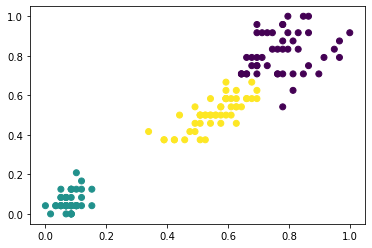

In [38]:
# Agglomerative Hierarchical Clustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity ='cityblock', linkage = 'complete')

cluster.fit_predict(X)

# plot the clusters
plt.scatter(X[:,0], X[:,1], c=cluster.labels_);

In [39]:
from sklearn.metrics import silhouette_score

score = round(silhouette_score(X, cluster.labels_, metric='cityblock'),2)

score

0.69

The Silhouette score is 0.69 which is a good score because it is close to 1. The chosen clustering solution was able to successfully separate the data points into 3 clusters as it can be seen in the plot above. The clustering solution gives good confidence in its clustering of the data points.